In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['mrf.csv']))
print(df)

Saving mrf.csv to mrf (6).csv
         Date\tOpen\tHigh\tLow\tClose\tVolume
0      25/06/2018\t156\t159\t156\t158\t260754
1     26/06/2018\t158\t169\t158\t167\t4327614
2     27/06/2018\t165\t174\t163\t174\t2518378
3     28/06/2018\t174\t174\t170\t170\t1042349
4      29/06/2018\t170\t173\t170\t172\t566300
...                                       ...
1242   19/06/2023\t117\t117\t113\t114\t181054
1243   20/06/2023\t114\t114\t112\t113\t372986
1244   21/06/2023\t114\t114\t113\t114\t434610
1245   22/06/2023\t112\t115\t111\t111\t490680
1246  23/06/2023\t112\t112\t107\t108\t1546114

[1247 rows x 1 columns]


In [ ]:
df = pd.read_csv('mrf.csv', delimiter='\t')

In [ ]:
print(df.head())

         Date  Open  High  Low  Close   Volume
0  25/06/2018   156   159  156    158   260754
1  26/06/2018   158   169  158    167  4327614
2  27/06/2018   165   174  163    174  2518378
3  28/06/2018   174   174  170    170  1042349
4  29/06/2018   170   173  170    172   566300


In [ ]:
df.loc[:,'AdjClose'] = df['Close']

In [ ]:
df = df[['Date', 'AdjClose']]

In [ ]:
df.rename(columns={'Date' : 'date', 'AdjClose' : 'price_t'}, inplace=True)

In [ ]:
df['price_t-1'] = df['price_t'].shift(1)

In [ ]:
df['returns_manual'] = (df['price_t'] / df['price_t-1']) - 1

In [ ]:
df['returns_pct_change_method'] = df['price_t'].pct_change(1)
print(df)

            price_t  price_t-1  returns_manual  returns_pct_change_method  \
date                                                                        
25/06/2018      158        NaN             NaN                        NaN   
26/06/2018      167      158.0        0.056962                   0.056962   
27/06/2018      174      167.0        0.041916                   0.041916   
28/06/2018      170      174.0       -0.022989                  -0.022989   
29/06/2018      172      170.0        0.011765                   0.011765   
...             ...        ...             ...                        ...   
19/06/2023      114      113.0        0.008850                   0.008850   
20/06/2023      113      114.0       -0.008772                  -0.008772   
21/06/2023      114      113.0        0.008850                   0.008850   
22/06/2023      111      114.0       -0.026316                  -0.026316   
23/06/2023      108      111.0       -0.027027                  -0.027027   

<ipython-input-106-f4094db7e6ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns_pct_change_method'] = df['price_t'].pct_change(1)


In [ ]:
df['returns'] = (df['price_t'] / df['price_t'].shift(1)) - 1
# Assuming you have a DataFrame named 'df' with the calculated daily returns
pd.set_option('display.max_rows', None)  # Set to None for unlimited rows
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns

# Print the DataFrame with all values displayed
print(df)

            price_t  price_t-1  returns_manual  returns_pct_change_method  \
date                                                                        
25/06/2018      158        NaN             NaN                        NaN   
26/06/2018      167      158.0        0.056962                   0.056962   
27/06/2018      174      167.0        0.041916                   0.041916   
28/06/2018      170      174.0       -0.022989                  -0.022989   
29/06/2018      172      170.0        0.011765                   0.011765   
02/07/2018      170      172.0       -0.011628                  -0.011628   
03/07/2018      164      170.0       -0.035294                  -0.035294   
04/07/2018      170      164.0        0.036585                   0.036585   
05/07/2018      168      170.0       -0.011765                  -0.011765   
06/07/2018      169      168.0        0.005952                   0.005952   
09/07/2018      170      169.0        0.005917                   0.005917   

<ipython-input-108-370ad7345fe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = (df['price_t'] / df['price_t'].shift(1)) - 1


In [ ]:
df.set_index('date', inplace=True)

<Axes: xlabel='date'>

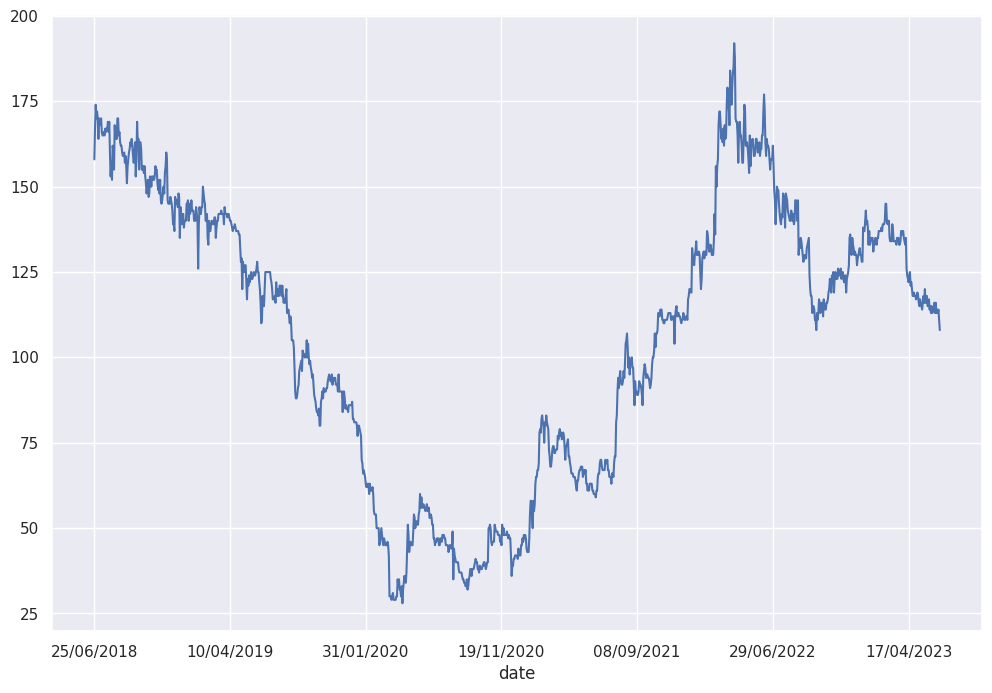

In [ ]:
df['price_t'].plot(figsize=(12, 8))

<Axes: xlabel='date'>

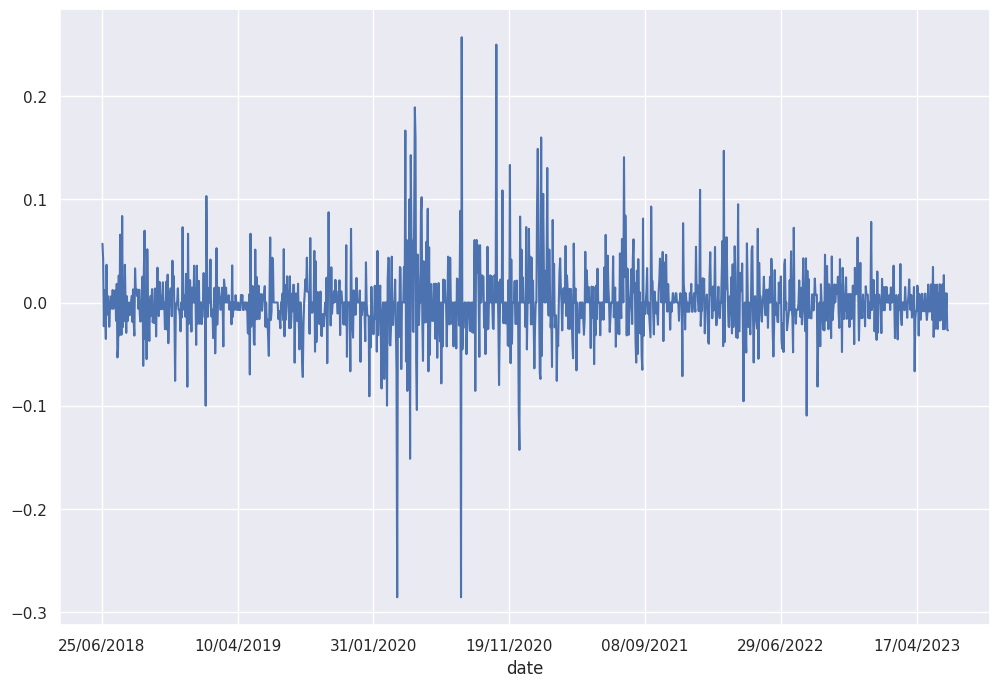

In [ ]:
df['returns'].plot(figsize=(12, 8))